In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors
from matplotlib import rc
from numpy import inf
import os

from os import listdir


import uproot3

import matplotlib as mpl

from datetime import datetime
import subprocess



/Users/owen/.pyenv/versions/3.8.1/lib/python3.8/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
input_file = '/Volumes/Ext_2022_03/work/calo-reco/data/2022-06-28/insert_reco_pi-_50GeV_theta_2.83deg.edm4hep.root'

ur_file = uproot3.open( input_file )

print( ur_file.keys() )

ur_tree = ur_file['events']

print( ur_tree )

ur_tree.show()

[b'events;141', b'events;140', b'events;139', b'metadata;1', b'run_metadata;1', b'evt_metadata;1', b'col_metadata;1']
<TTree b'events' at 0x000235e61dc0>
HcalEndcapHitsDigi         TStreamerSTL               asdtype('>i4')
HcalEndcapHitsDigi.cellID  TStreamerBasicType         asjagged(asdtype('>u8'))
HcalEndcapHitsDigi.amplitude
                           TStreamerBasicType         asjagged(asdtype('>u8'))
HcalEndcapHitsDigi.timeStamp
                           TStreamerBasicType         asjagged(asdtype('>u8'))

HcalEndcapPHitsReco        TStreamerSTL               asdtype('>i4')
HcalEndcapPHitsReco.cellID TStreamerBasicType         asjagged(asdtype('>u8'))
HcalEndcapPHitsReco.energy TStreamerBasicType         asjagged(asdtype('>f4'))
HcalEndcapPHitsReco.energyError
                           TStreamerBasicType         asjagged(asdtype('>f4'))
HcalEndcapPHitsReco.time   TStreamerBasicType         asjagged(asdtype('>f4'))
HcalEndcapPHitsReco.timeError
                           TStream

In [3]:
df_hcal_endcapp_hits = ur_tree.pandas.df( ['HcalEndcapPHits*'], entrystop=100, flatten=False )
df_hcal_endcapp_hits

,HcalEndcapPHitsReco,HcalEndcapPHitsReco.cellID,HcalEndcapPHitsReco.energy,HcalEndcapPHitsReco.energyError,HcalEndcapPHitsReco.time,HcalEndcapPHitsReco.timeError,HcalEndcapPHitsReco.position.x,HcalEndcapPHitsReco.position.y,HcalEndcapPHitsReco.position.z,HcalEndcapPHitsReco.dimension.x,...,HcalEndcapPHitsRecoXY.position.y,HcalEndcapPHitsRecoXY.position.z,HcalEndcapPHitsRecoXY.dimension.x,HcalEndcapPHitsRecoXY.dimension.y,HcalEndcapPHitsRecoXY.dimension.z,HcalEndcapPHitsRecoXY.sector,HcalEndcapPHitsRecoXY.layer,HcalEndcapPHitsRecoXY.local.x,HcalEndcapPHitsRecoXY.local.y,HcalEndcapPHitsRecoXY.local.z
entry,,,,,,,,,,,,,,,,,,,,,
0,276,"[562932790788208, 562932790689904, 84440776740...","[0.00012207031, 0.00010986328, 5.493164e-05, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[134.26, 15.35, 41.26, 25.46, 72.98, 349.96, 3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-400.0, -400.0, -400.0, -200.0, -300.0, -200....","[100.0, 100.0, 200.0, 300.0, 400.0, 400.0, 400...","[4125.7, 4055.5, 4055.5, 3985.3, 3938.5, 3891....","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",...,"[-800.0, -900.0, -900.0, -1000.0, -900.0, -900...","[3811.7, 3811.7, 3811.7, 3811.7, 3811.7, 3811....","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-10.0, -10.0, -20.0, -30.0, -30.0, 0.0, 0.0, ...","[-80.0, -90.0, -90.0, -100.0, -90.0, -90.0, -7...","[-58.33, -58.33, -58.33, -58.33, -58.33, -58.3..."
1,604,"[1407366310494320, 1125891333783664, 112589562...","[4.272461e-05, 1.8310548e-05, 0.00020141601, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[72.27, 39.69, 16.37, 35.59, 76.59, 72.69, 27....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-200.0, -200.0, -100.0, -100.0, -200.0, 0.0, ...","[400.0, 300.0, 300.0, 400.0, 300.0, 400.0, 400...","[3868.3, 3868.3, 3915.1, 3985.3, 3985.3, 3821....","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",...,"[400.0, 600.0, 700.0, 300.0, 900.0, 800.0, 500...","[3811.7, 3811.7, 3811.7, 3811.7, 3811.7, 3811....","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-50.0, -70.0, -80.0, -40.0, 170.0, 170.0, 60....","[40.0, 60.0, 70.0, 30.0, 90.0, 80.0, 50.0, 60....","[-58.33, -58.33, -58.33, -58.33, -58.33, -58.3..."
2,608,"[18446181119478169712, 18446181119478136944, 1...","[0.00029296876, 0.00018310547, 7.324219e-05, 9...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[55.93, 26.44, 131.69, 93.45, 20.38, 50.9, 123...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-100.0, -100.0, 0.0, 0.0, -100.0, -100.0, -30...","[-300.0, -300.0, -400.0, -400.0, -300.0, -300....","[3961.9, 3938.5, 4195.9, 4172.5, 4125.7, 4078....","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",...,"[500.0, -600.0, -600.0, -700.0, -700.0, 100.0,...","[3811.7, 3811.7, 3811.7, 3811.7, 3811.7, 3811....","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[30.0, -90.0, -100.0, -60.0, -100.0, 240.0, 30...","[50.0, -60.0, -60.0, -70.0, -70.0, 10.0, 40.0,...","[-58.33, -58.33, -58.33, -58.33, -58.33, -58.3..."
3,486,"[1125891334176880, 844407767531632, 1125887039...","[5.493164e-05, 2.4414063e-05, 1.2207031e-05, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[59.91, 2339.76, 39.9, 231.64, 26.71, 9027.23,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-200.0, -400.0, -300.0, -400.0, -400.0, -400....","[300.0, 200.0, 300.0, 300.0, 400.0, 300.0, 300...","[4

In [4]:
df_hcal_endcappinsert_hits = ur_tree.pandas.df( ['HcalEndcapPInsertHits*'], entrystop=100, flatten=False )
df_hcal_endcappinsert_hits

,HcalEndcapPInsertHitsDigi,HcalEndcapPInsertHitsDigi.cellID,HcalEndcapPInsertHitsDigi.amplitude,HcalEndcapPInsertHitsDigi.timeStamp,HcalEndcapPInsertHitsReco,HcalEndcapPInsertHitsReco.cellID,HcalEndcapPInsertHitsReco.energy,HcalEndcapPInsertHitsReco.energyError,HcalEndcapPInsertHitsReco.time,HcalEndcapPInsertHitsReco.timeError,...,HcalEndcapPInsertHitsRecoXY.position.y,HcalEndcapPInsertHitsRecoXY.position.z,HcalEndcapPInsertHitsRecoXY.dimension.x,HcalEndcapPInsertHitsRecoXY.dimension.y,HcalEndcapPInsertHitsRecoXY.dimension.z,HcalEndcapPInsertHitsRecoXY.sector,HcalEndcapPInsertHitsRecoXY.layer,HcalEndcapPInsertHitsRecoXY.local.x,HcalEndcapPInsertHitsRecoXY.local.y,HcalEndcapPInsertHitsRecoXY.local.z
entry,,,,,,,,,,,,,,,,,,,,,
0,1188,"[1407353450692714, 281449248915562, 1407353450...","[504, 448, 16462, 14929, 4591, 565, 916, 597, ...","[1278, 176265, 1285, 1293, 1301, 1312, 1318, 1...",822,"[1407353450692714, 281449248915562, 1407353450...","[0.0006347656, 0.00029296876, 0.098034665, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[12.78, 1762.65, 12.85, 12.93, 13.01, 13.12, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[-270.0, -240.0, -270.0, 210.0, -120.0, -150.0...","[3811.7, 3811.7, 3811.7, 3811.7, 3811.7, 3811....","[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....","[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-30.0, -30.0, -27.0, 24.0, -27.0, -24.0, 30.0...","[-27.0, -24.0, -27.0, 21.0, -12.0, -15.0, 21.0...","[-58.135, -58.135, -58.135, -58.135, -58.135, ..."
1,2354,"[1970320584015978, 2251786970792042, 184453367...","[2701, 499, 407, 411, 415, 413, 6953, 3307, 49...","[1284, 6643, 2354, 8223, 18861, 22726, 1276, 1...",1657,"[1970320584015978, 2251786970792042, 184453367...","[0.01404419, 0.000604248, 4.272461e-05, 6.7138...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[12.84, 66.43, 23.54, 82.23, 188.61, 227.26, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[-120.0, 120.0, -240.0, 300.0, -240.0, 0.0, -1...","[3811.7, 3811.7, 3811.7, 3811.7, 3811.7, 3811....","[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....","[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[21.0, -21.0, -12.0, -21.0, -21.0, 27.0, 21.0,...","[-12.0, 12.0, -24.0, 30.0, -24.0, 0.0, -18.0, ...","[-58.135, -58.135, -58.135, -58.135, -58.135, ..."
2,1852,"[18445055223891263594, 18445055223891296362, 1...","[480, 490, 495, 494, 494, 525, 445, 393, 400, ...","[1277, 1285, 1292, 1300, 1308, 1316, 1418, 932...",1291,"[18445055223891263594, 18445055223891296362, 1...","[0.00048828125, 0.0005493164, 0.000579834, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[12.77, 12.85, 12.92, 13.0, 13.08, 13.16, 14.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[210.0, -90.0, -300.0, -210.0, 180.0, -300.0, ...","[3811.7, 3811.7, 3811.7, 3811.7, 3811.7, 3811....","[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....","[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[18.0, 12.0, 27.0, 27.0, -21.0, 12.0, 15.0, 18...","[21.0, -9.0, -30.0, -21.0, 18.0, -30.0, -12.0,...","[-58.135, -58.135, -58.135, -58.135, -58.135, ..."
3,1538,"[2251799855726698, 1970329174016106, 168885419...","[442, 432, 435, 403, 410, 441, 794, 408, 399, ...","[2013, 3094, 1670, 1742, 2610, 2810, 1295, 126...",1099,"[2251799855726698, 1970329174016106, 168885419...","[0.00025634764, 0.0001953125, 0.00021362305, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[20.13, 30.94, 16.7, 17.42, 26.1, 28.1, 12.95,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [5]:
df_hcal_endcapp_hits['HcalEndcapPHitsReco']

entry
0     276
1     604
2     608
3     486
4     448
     ... 
95    517
96    600
97    564
98    500
99    524
Name: HcalEndcapPHitsReco, Length: 100, dtype: int32

In [6]:
df_hcal_endcappinsert_hits['HcalEndcapPInsertHitsReco']

entry
0      822
1     1657
2     1291
3     1099
4      933
      ... 
95    1170
96    1507
97    1266
98    1240
99    1193
Name: HcalEndcapPInsertHitsReco, Length: 100, dtype: int32

In [7]:
df_hcal_endcapp_hits['HcalEndcapPHitsReco.position.x']

entry
0     [-400.0, -400.0, -400.0, -200.0, -300.0, -200....
1     [-200.0, -200.0, -100.0, -100.0, -200.0, 0.0, ...
2     [-100.0, -100.0, 0.0, 0.0, -100.0, -100.0, -30...
3     [-200.0, -400.0, -300.0, -400.0, -400.0, -400....
4     [-400.0, -400.0, -400.0, -500.0, -500.0, -500....
                            ...                        
95    [-100.0, -200.0, 100.0, 200.0, 200.0, 300.0, 2...
96    [-100.0, 0.0, 0.0, -100.0, -100.0, -100.0, -10...
97    [300.0, 400.0, 300.0, 200.0, 200.0, 300.0, 200...
98    [-200.0, -300.0, -300.0, -300.0, 300.0, 400.0,...
99    [600.0, 600.0, 600.0, 600.0, 600.0, 500.0, -40...
Name: HcalEndcapPHitsReco.position.x, Length: 100, dtype: object

In [8]:
df_hcal_endcappinsert_hits['HcalEndcapPInsertHitsReco.position.x']

entry
0     [-250.0, -280.0, -250.0, -250.0, -250.0, -250....
1     [-130.0, -190.0, -10.0, 20.0, -10.0, -40.0, -1...
2     [-100.0, -100.0, -100.0, -100.0, -100.0, -100....
3     [-100.0, -70.0, -70.0, -100.0, -190.0, -160.0,...
4     [-280.0, -280.0, -280.0, -280.0, -280.0, -280....
                            ...                        
95    [-70.0, -100.0, 20.0, 140.0, 170.0, 200.0, 200...
96    [-70.0, -70.0, -70.0, -70.0, -70.0, -70.0, -70...
97    [80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 110...
98    [-220.0, -220.0, -220.0, -220.0, -220.0, -220....
99    [-280.0, -280.0, -10.0, -190.0, -370.0, -340.0...
Name: HcalEndcapPInsertHitsReco.position.x, Length: 100, dtype: object

In [9]:
df_hcal_endcapp_hits['HcalEndcapPHitsReco.energy']

entry
0     [0.00012207031, 0.00010986328, 5.493164e-05, 0...
1     [4.272461e-05, 1.8310548e-05, 0.00020141601, 0...
2     [0.00029296876, 0.00018310547, 7.324219e-05, 9...
3     [5.493164e-05, 2.4414063e-05, 1.2207031e-05, 1...
4     [7.93457e-05, 0.00088500977, 0.00017700196, 0....
                            ...                        
95    [0.0010803223, 7.93457e-05, 9.1552734e-05, 0.0...
96    [8.544922e-05, 0.00010375977, 2.4414063e-05, 0...
97    [0.00010375977, 1.2207031e-05, 0.0001953125, 8...
98    [6.1035156e-05, 6.1035156e-05, 0.00010375977, ...
99    [8.544922e-05, 2.4414063e-05, 3.6621095e-05, 0...
Name: HcalEndcapPHitsReco.energy, Length: 100, dtype: object

In [10]:
df_hcal_endcappinsert_hits['HcalEndcapPInsertHitsReco.energy']

entry
0     [0.0006347656, 0.00029296876, 0.098034665, 0.0...
1     [0.01404419, 0.000604248, 4.272461e-05, 6.7138...
2     [0.00048828125, 0.0005493164, 0.000579834, 0.0...
3     [0.00025634764, 0.0001953125, 0.00021362305, 1...
4     [0.00047607423, 0.00039672852, 0.00053100585, ...
                            ...                        
95    [0.0019226074, 0.059509277, 4.272461e-05, 4.27...
96    [0.00035400392, 0.00033569336, 0.0007568359, 0...
97    [0.00046386718, 0.00092773436, 0.0007324219, 0...
98    [0.0004943848, 0.00061035156, 0.00057373045, 0...
99    [0.0008972168, 0.0026306151, 6.1035156e-05, 2....
Name: HcalEndcapPInsertHitsReco.energy, Length: 100, dtype: object

In [11]:
hcal_ec_hits_x = np.array(df_hcal_endcapp_hits['HcalEndcapPHitsReco.position.x'])

In [13]:
hcal_ec_hits_y = np.array(df_hcal_endcapp_hits['HcalEndcapPHitsReco.position.y'])

In [15]:
nevents = 10000

In [16]:
hcal_ec_hits_t_ar = ur_tree.array('HcalEndcapPHitsReco.time', entrystop=nevents)
hcal_eci_hits_t_ar = ur_tree.array('HcalEndcapPInsertHitsReco.time', entrystop=nevents)

In [17]:
hcal_ec_hits_t_ar_flat = hcal_ec_hits_t_ar.flatten()
hcal_eci_hits_t_ar_flat = hcal_eci_hits_t_ar.flatten()

In [18]:
hcal_ec_hits_x_ar = ur_tree.array('HcalEndcapPHitsReco.position.x', entrystop=nevents)
hcal_ec_hits_y_ar = ur_tree.array('HcalEndcapPHitsReco.position.y', entrystop=nevents)
hcal_ec_hits_z_ar = ur_tree.array('HcalEndcapPHitsReco.position.z', entrystop=nevents)
hcal_ec_hits_e_ar = ur_tree.array('HcalEndcapPHitsReco.energy', entrystop=nevents)

In [19]:
hcal_ec_hits_x_ar_flat = hcal_ec_hits_x_ar.flatten()
hcal_ec_hits_y_ar_flat = hcal_ec_hits_y_ar.flatten()
hcal_ec_hits_z_ar_flat = hcal_ec_hits_z_ar.flatten()
hcal_ec_hits_e_ar_flat = hcal_ec_hits_e_ar.flatten()

In [20]:
hcal_eci_hits_x_ar = ur_tree.array('HcalEndcapPInsertHitsReco.position.x', entrystop=nevents)
hcal_eci_hits_y_ar = ur_tree.array('HcalEndcapPInsertHitsReco.position.y', entrystop=nevents)
hcal_eci_hits_z_ar = ur_tree.array('HcalEndcapPInsertHitsReco.position.z', entrystop=nevents)
hcal_eci_hits_e_ar = ur_tree.array('HcalEndcapPInsertHitsReco.energy', entrystop=nevents)

In [21]:
hcal_eci_hits_x_ar_flat = hcal_eci_hits_x_ar.flatten()
hcal_eci_hits_y_ar_flat = hcal_eci_hits_y_ar.flatten()
hcal_eci_hits_z_ar_flat = hcal_eci_hits_z_ar.flatten()
hcal_eci_hits_e_ar_flat = hcal_eci_hits_e_ar.flatten()

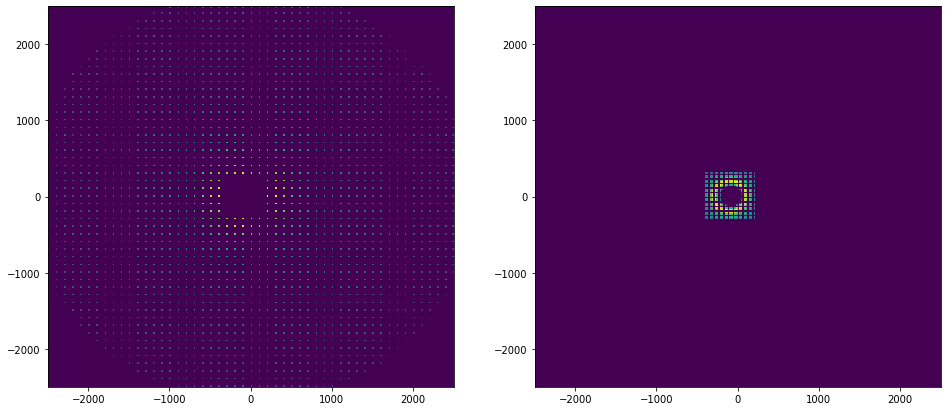

In [22]:
fig,ax = plt.subplots(1,2, figsize=(16, 7))

ax[0].hist2d( hcal_ec_hits_x_ar_flat, hcal_ec_hits_y_ar_flat, weights=hcal_ec_hits_e_ar_flat, bins=250, range=([-2500,2500],[-2500,2500]), norm=mcolors.PowerNorm(0.2)) 
ax[1].hist2d( hcal_eci_hits_x_ar_flat, hcal_eci_hits_y_ar_flat, weights=hcal_eci_hits_e_ar_flat, bins=250, range=([-2500,2500],[-2500,2500]), norm=mcolors.PowerNorm(0.2)) 

plt.show()

In [23]:
hcal_eci_hits_e_ar.sum()

array([0.6247254 , 0.9672973 , 0.61903685, ..., 0.13955078, 0.7201233 ,
       0.10878295], dtype=float32)

In [24]:
hcal_ec_hits_e_ar.sum()

array([0.03813476, 0.10703736, 0.07528076, ..., 0.00108032, 0.06795654,
       0.00925293], dtype=float32)

In [25]:
hcal_ec_hits_e_ar.count()

array([276, 604, 608, ...,   9, 509,  30])

In [26]:
hcal_ec_hits_e_ar.sum().size

10000

In [27]:
np.max(hcal_ec_hits_e_ar.sum())

1.3343079

In [28]:
np.max(hcal_eci_hits_e_ar.sum())

1.1914368

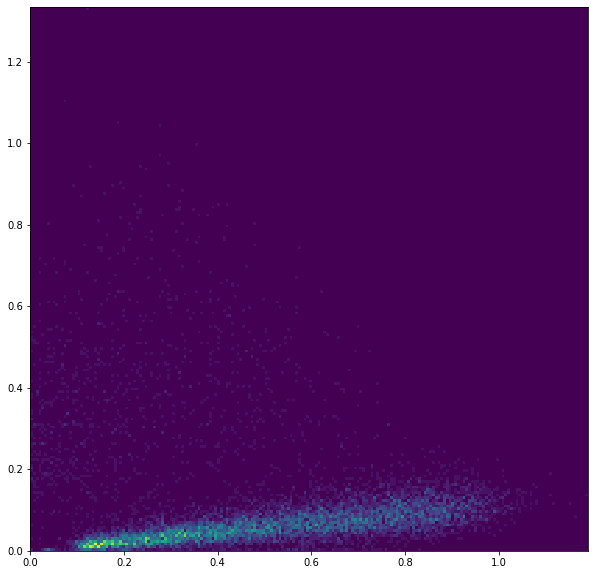

In [29]:
fig,ax = plt.subplots(1,1, figsize=(10, 10))
ax.hist2d(hcal_eci_hits_e_ar.sum(), hcal_ec_hits_e_ar.sum(), bins=200 )
plt.show()

In [30]:
df_mcp = ur_tree.pandas.df( ['MCParticles*'], entrystop=100, flatten=False )
df_mcp

,MCParticles,MCParticles.PDG,MCParticles.generatorStatus,MCParticles.simulatorStatus,MCParticles.charge,MCParticles.time,MCParticles.mass,MCParticles.vertex.x,MCParticles.vertex.y,MCParticles.vertex.z,...,MCParticles.parents_begin,MCParticles.parents_end,MCParticles.daughters_begin,MCParticles.daughters_end,MCParticles#0,MCParticles#0.index,MCParticles#0.collectionID,MCParticles#1,MCParticles#1.index,MCParticles#1.collectionID
entry,,,,,,,,,,,,,,,,,,,,,
0,3,"[11, 2212, -211]","[4, 4, 1]","[0, 0, 16777216]","[-1.0, 1.0, -1.0]","[0.0, 0.0, 0.0]","[0.0, 0.938, 0.1395699999947043]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",...,"[0, 0, 0]","[0, 0, 2]","[0, 1, 2]","[1, 2, 2]",2,"[0, 1]","[1, 1]",2,"[2, 2]","[1, 1]"
1,4,"[11, 2212, -211, 11]","[4, 4, 1, 0]","[0, 0, 16777216, 1493172224]","[-1.0, 1.0, -1.0, -1.0]","[0.0, 0.0, 0.0, 31.00937]","[0.0, 0.938, 0.1395700000028498, 0.00051099891]","[0.0, 0.0, 0.0, 11.29267387022063]","[0.0, 0.0, 0.0, -19.45317021449504]","[0.0, 0.0, 0.0, 1918.9017891707997]",...,"[0, 0, 0, 2]","[0, 0, 2, 3]","[0, 1, 2, 3]","[1, 2, 3, 3]",3,"[0, 1, 2]","[1, 1, 1]",3,"[2, 2, 3]","[1, 1, 1]"
2,3,"[11, 2212, -211]","[4, 4, 1]","[0, 0, 16777216]","[-1.0, 1.0, -1.0]","[0.0, 0.0, 0.0]","[0.0, 0.938, 0.1395699999963334]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",...,"[0, 0, 0]","[0, 0, 2]","[0, 1, 2]","[1, 2, 2]",2,"[0, 1]","[1, 1]",2,"[2, 2]","[1, 1]"
3,3,"[11, 2212, -211]","[4, 4, 1]","[0, 0, 16777216]","[-1.0, 1.0, -1.0]","[0.0, 0.0, 0.0]","[0.0, 0.938, 0.1395699999995916]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",...,"[0, 0, 0]","[0, 0, 2]","[0, 1, 2]","[1, 2, 2]",2,"[0, 1]","[1, 1]",2,"[2, 2]","[1, 1]"
4,3,"[11, 2212, -211]","[4, 4, 1]","[0, 0, 16777216]","[-1.0, 1.0, -1.0]","[0.0, 0.0, 0.0]","[0.0, 0.938, 0.13956999999714795]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",...,"[0, 0, 0]","[0, 0, 2]","[0, 1, 2]","[1, 2, 2]",2,"[0, 1]","[1, 1]",2,"[2, 2]","[1, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,"[11, 2212, -211]","[4, 4, 1]","[0, 0, 16777216]","[-1.0, 1.0, -1.0]","[0.0, 0.0, 0.0]","[0.0, 0.938, 0.1395699999995916]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",...,"[0, 0, 0]","[0, 0, 2]","[0, 1, 2]","[1, 2, 2]",2,"[0, 1]","[1, 1]",2,"[2, 2]","[1, 1]"
96,3,"[11, 2212, -211]","[4, 4, 1]","[0, 0, 16777216]","[-1.0, 1.0, -1.0]","[0.0, 0.0, 0.0]","[0.0, 0.938, 0.1395699999979625]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",...,"[0, 0, 0]","[0, 0, 2]","[0, 1, 2]","[1, 2, 2]",2,"[0, 1]","[1, 1]",2,"[2, 2]","[1, 1]"
97,7,"[11, 2212, -211, 11, 11, 11, 11]","[4, 4, 1, 0, 0, 0, 0]","[0, 0, 16777216, 1493172224, 1493172224, 13589...","[-1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0]","[0.0, 0.0, 0.0, 3.0360465, 3.0719316, 3.186824...","[0.0, 0.938, 0.1395699999979625, 0.00051099891...","[0.0, 0.0, 0.0, 16.03121616164127, 16.21915171...","[0.0, 0.0, 0.0, -22.72645167710514, -22.995804...","[0.0, 0.0, 0.0, 909.753512832566, 920.50650798...",...,"[0, 0, 0, 2, 3, 4, 5]","[0, 0, 2, 3, 4, 5, 6]","[0, 1, 2, 6, 6, 6, 6]","[1, 2, 6, 6, 6, 6, 6]",6,"[0, 1, 2, 2, 2, 2]","[1, 1, 1, 1, 1, 1]",6,"[2, 2, 3, 4, 5, 6]","[1, 1, 1, 1, 1, 1]"


In [31]:
mcp_pz = ur_tree.array('MCParticles.momentum.z',entrystop=nevents)

In [32]:
mcp_pz

<JaggedArray [[10.0 0.0 56.019775] [10.0 0.0 81.11606 -0.0028019315] [10.0 0.0 60.85021] ... [10.0 0.0 11.3264265] [10.0 0.0 70.462845] [10.0 0.0 10.464854]] at 0x000236304370>

In [33]:
mcp_pz[:,2]

array([56.019775 , 81.11606  , 60.85021  , ..., 11.3264265, 70.462845 ,
       10.464854 ], dtype=float32)

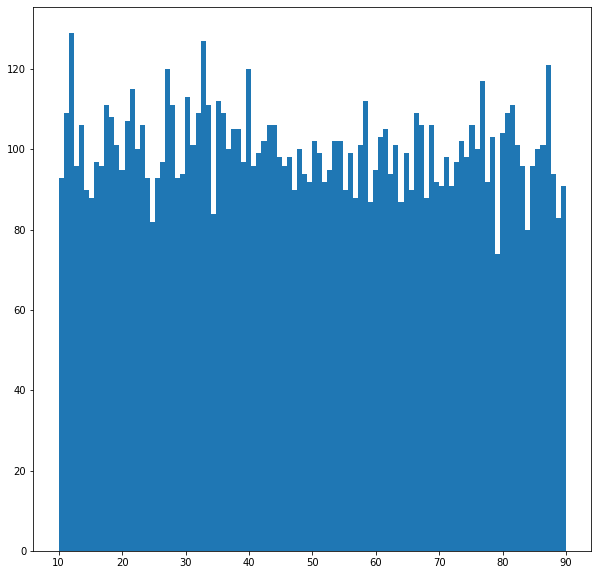

In [34]:
fig,ax = plt.subplots(1,1, figsize=(10, 10))

ax.hist( mcp_pz[:,2], bins=100)

plt.show()

In [35]:
mcp_px = ur_tree.array('MCParticles.momentum.x', entrystop=nevents )
mcp_py = ur_tree.array('MCParticles.momentum.y', entrystop=nevents )

In [36]:
pion_px = mcp_px[:,2]
pion_py = mcp_py[:,2]
pion_pz = mcp_pz[:,2]

In [37]:
pion_pz

array([56.019775 , 81.11606  , 60.85021  , ..., 11.3264265, 70.462845 ,
       10.464854 ], dtype=float32)

In [38]:
pion_phi = np.arctan2(pion_py, pion_px)

In [39]:
pion_phi

array([ 2.709437 ,  2.1060555, -2.0602105, ...,  2.6579592, -2.5692341,
       -3.0998023], dtype=float32)

In [40]:
pion_pt = np.sqrt( pion_px*pion_px + pion_py*pion_py )

In [41]:
pion_pt

array([3.982623  , 4.646826  , 3.408047  , ..., 0.7957455 , 4.835633  ,
       0.77960366], dtype=float32)

In [94]:
pion_p = np.sqrt( pion_px*pion_px + pion_py*pion_py + pion_pz*pion_pz )
pion_p

array([56.161167, 81.24905 , 60.94557 , ..., 11.354344, 70.62858 ,
       10.493854], dtype=float32)

In [95]:
pion_e = np.sqrt( pion_p*pion_p + 0.139*0.139 )
pion_e

array([56.16134 , 81.24917 , 60.945732, ..., 11.355195, 70.628716,
       10.494774], dtype=float32)

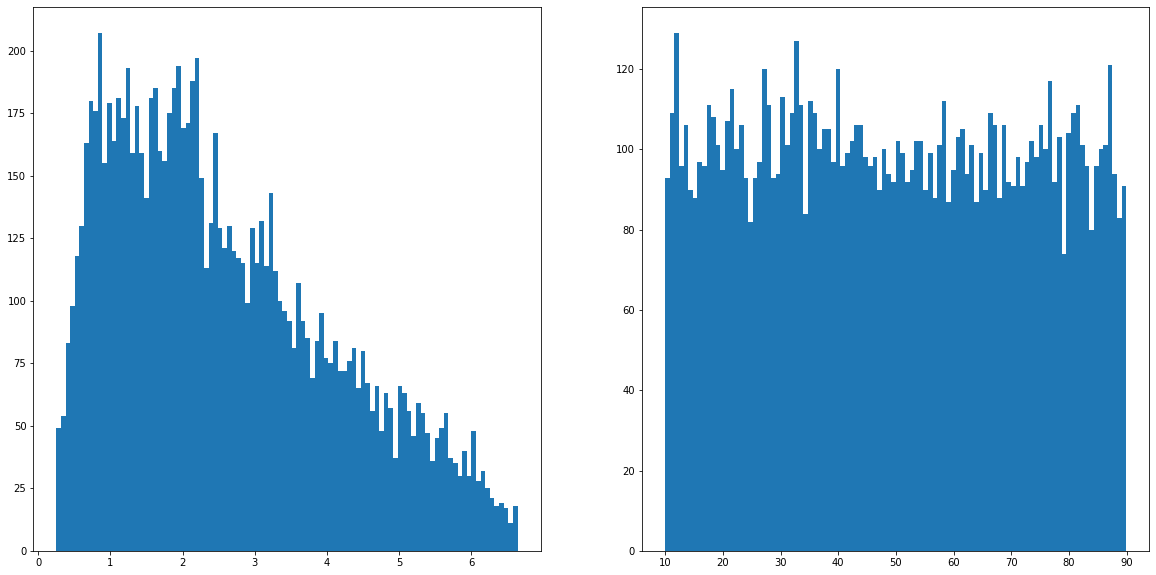

In [42]:
fig,ax = plt.subplots(1,2, figsize=(20, 10))

ax[0].hist( pion_pt, bins=100)
ax[1].hist( pion_pz, bins=100)

plt.show()

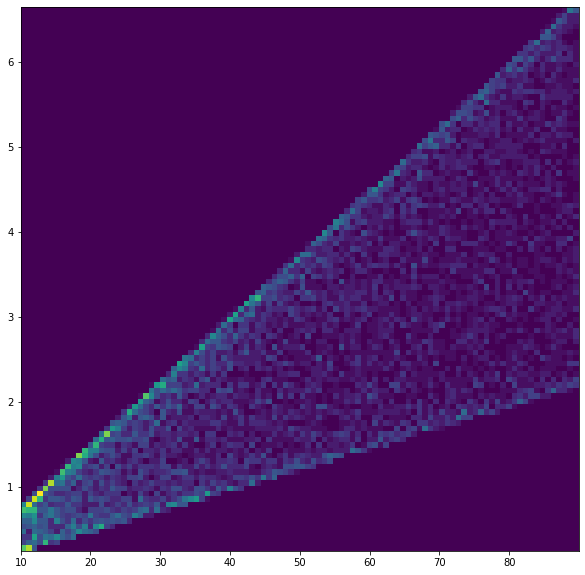

In [43]:
fig,ax = plt.subplots(1,1, figsize=(10, 10))

ax.hist2d( pion_pz, pion_pt, bins=100)

plt.show()

In [44]:
pion_theta_deg = (180./3.14159265)*np.arctan2(pion_pt, pion_pz)
pion_theta_deg

array([4.0664964, 3.2786705, 3.2056246, ..., 4.018749 , 3.9258652,
       4.2605124], dtype=float32)

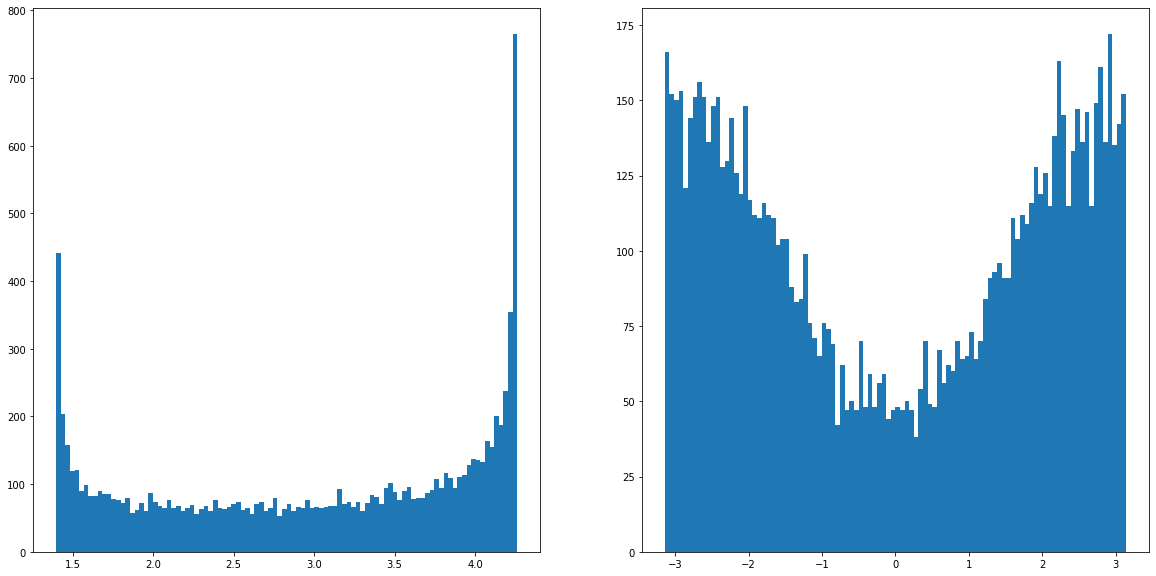

In [45]:
fig,ax = plt.subplots(1,2, figsize=(20, 10))

ax[0].hist( pion_theta_deg, bins=100)
ax[1].hist( pion_phi, bins=100)

plt.show()

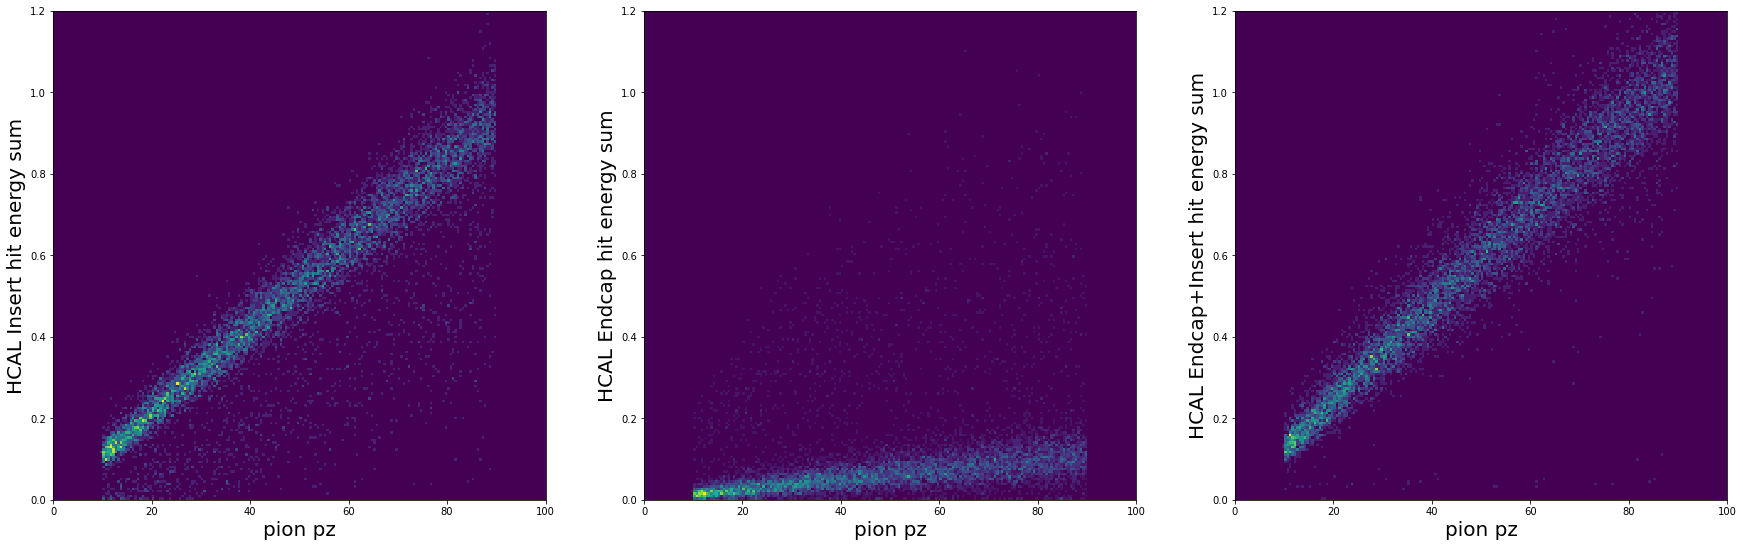

In [87]:
fig,ax = plt.subplots(1,3, figsize=(30, 9))



ax[0].hist2d(pion_pz, hcal_eci_hits_e_ar.sum(), bins=200, range=([0,100],[0,1.2]) )
ax[1].hist2d(pion_pz, hcal_ec_hits_e_ar.sum(), bins=200, range=([0,100],[0,1.2]) )
ax[2].hist2d(pion_pz, hcal_ec_hits_e_ar.sum() + hcal_eci_hits_e_ar.sum(), bins=200, range=([0,100],[0,1.2]) )

ax[0].set_xlabel('pion pz',fontsize=20)
ax[1].set_xlabel('pion pz',fontsize=20)
ax[2].set_xlabel('pion pz',fontsize=20)

ax[0].set_ylabel('HCAL Insert hit energy sum',fontsize=20)
ax[1].set_ylabel('HCAL Endcap hit energy sum',fontsize=20)
ax[2].set_ylabel('HCAL Endcap+Insert hit energy sum',fontsize=20)

#plt.savefig('esum-vs-pz.pdf')
plt.show()

<ipython-input-88-baef86350912>:4: RuntimeWarning: divide by zero encountered in true_divide
  ax[2].hist(hcal_ec_hits_e_ar.sum()/hcal_eci_hits_e_ar.sum(), bins=200, range=[0,1] )
<ipython-input-88-baef86350912>:4: RuntimeWarning: invalid value encountered in true_divide
  ax[2].hist(hcal_ec_hits_e_ar.sum()/hcal_eci_hits_e_ar.sum(), bins=200, range=[0,1] )


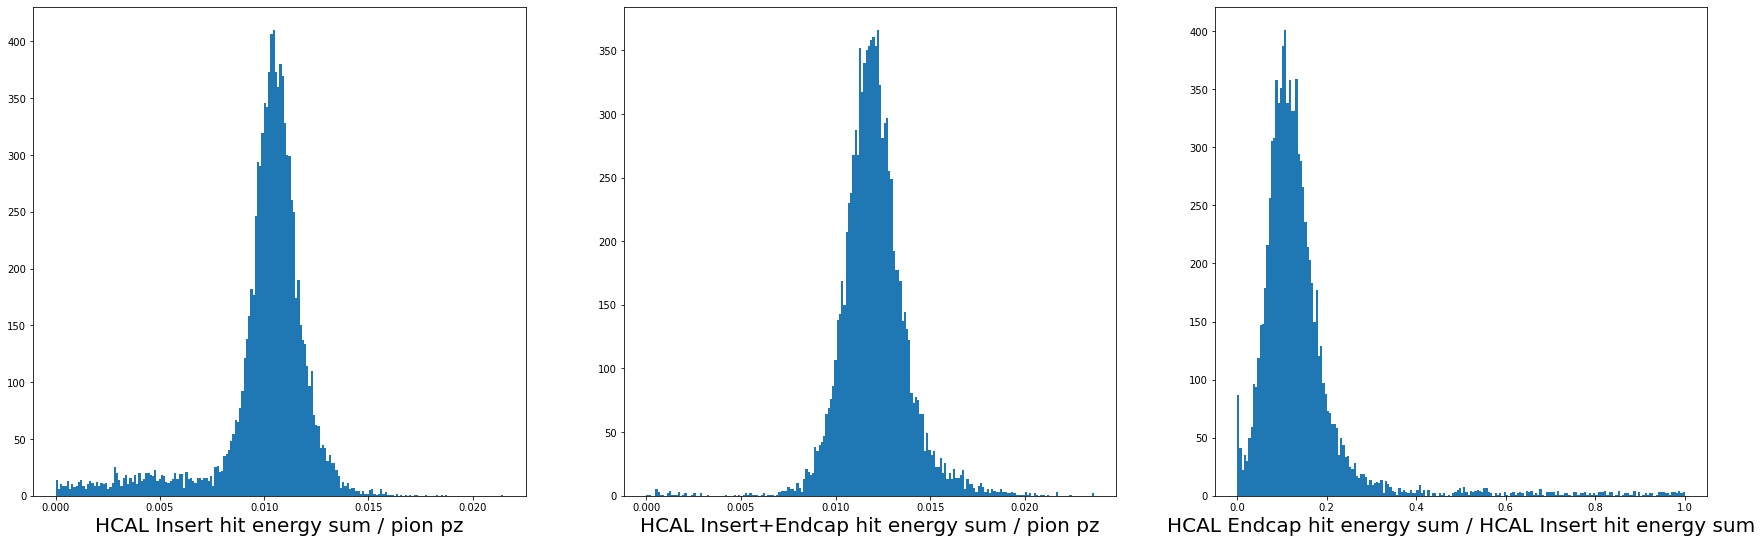

In [88]:
fig,ax = plt.subplots(1,3, figsize=(30, 9))
ax[0].hist(hcal_eci_hits_e_ar.sum()/pion_pz, bins=200 )
ax[1].hist((hcal_ec_hits_e_ar.sum() + hcal_eci_hits_e_ar.sum())/pion_pz, bins=200 )
ax[2].hist(hcal_ec_hits_e_ar.sum()/hcal_eci_hits_e_ar.sum(), bins=200, range=[0,1] )

ax[0].set_xlabel('HCAL Insert hit energy sum / pion pz', fontsize=20)
ax[1].set_xlabel('HCAL Insert+Endcap hit energy sum / pion pz', fontsize=20)
ax[2].set_xlabel('HCAL Endcap hit energy sum / HCAL Insert hit energy sum', fontsize=20)

#plt.savefig('esum-over-pz.pdf')
plt.show()

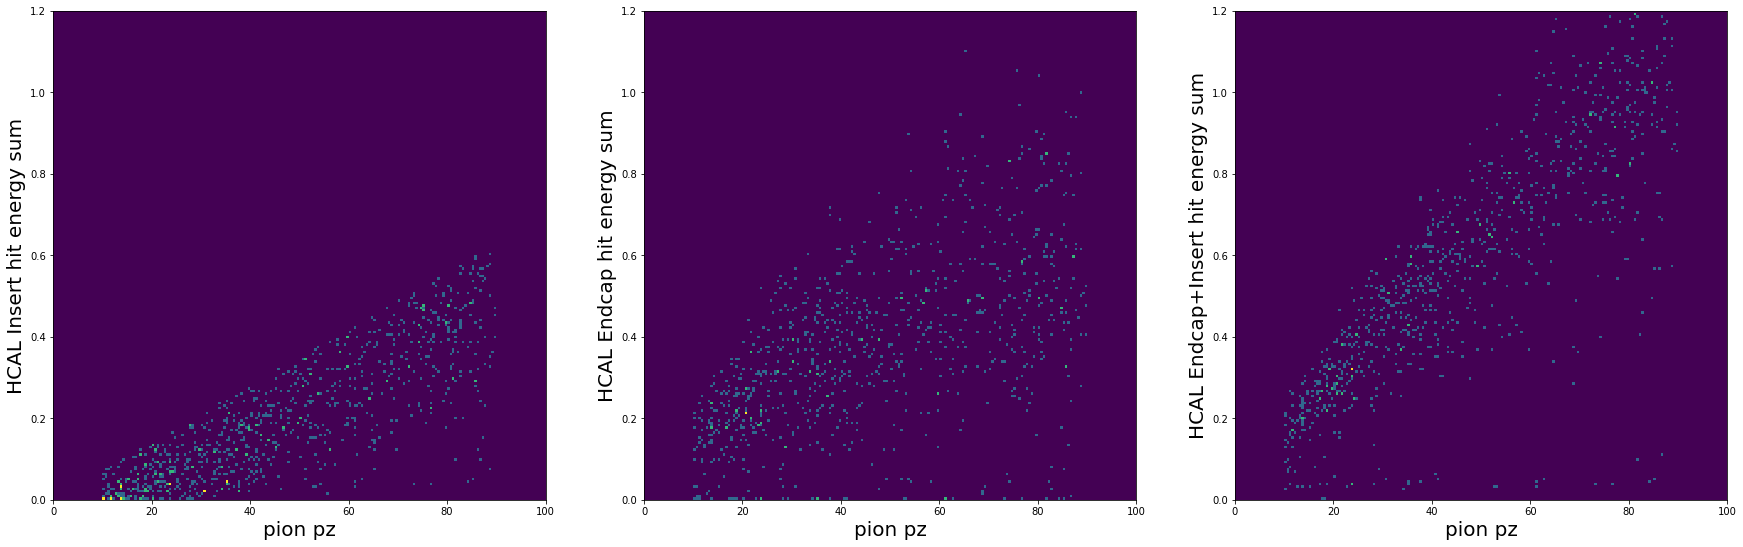

In [93]:
fig,ax = plt.subplots(1,3, figsize=(30, 9))

eci_esum = hcal_eci_hits_e_ar.sum()
ec_esum = hcal_ec_hits_e_ar.sum()

cuts=eci_esum/pion_pz<0.007

ax[0].hist2d(pion_pz[cuts], eci_esum[cuts], bins=200, range=([0,100],[0,1.2]) )
ax[1].hist2d(pion_pz[cuts], ec_esum[cuts], bins=200, range=([0,100],[0,1.2]) )
ax[2].hist2d(pion_pz[cuts], (ec_esum[cuts] + eci_esum[cuts]), bins=200, range=([0,100],[0,1.2]) )

ax[0].set_xlabel('pion pz',fontsize=20)
ax[1].set_xlabel('pion pz',fontsize=20)
ax[2].set_xlabel('pion pz',fontsize=20)

ax[0].set_ylabel('HCAL Insert hit energy sum',fontsize=20)
ax[1].set_ylabel('HCAL Endcap hit energy sum',fontsize=20)
ax[2].set_ylabel('HCAL Endcap+Insert hit energy sum',fontsize=20)

#plt.savefig('esum-vs-pz-tail-only.pdf')
plt.show()

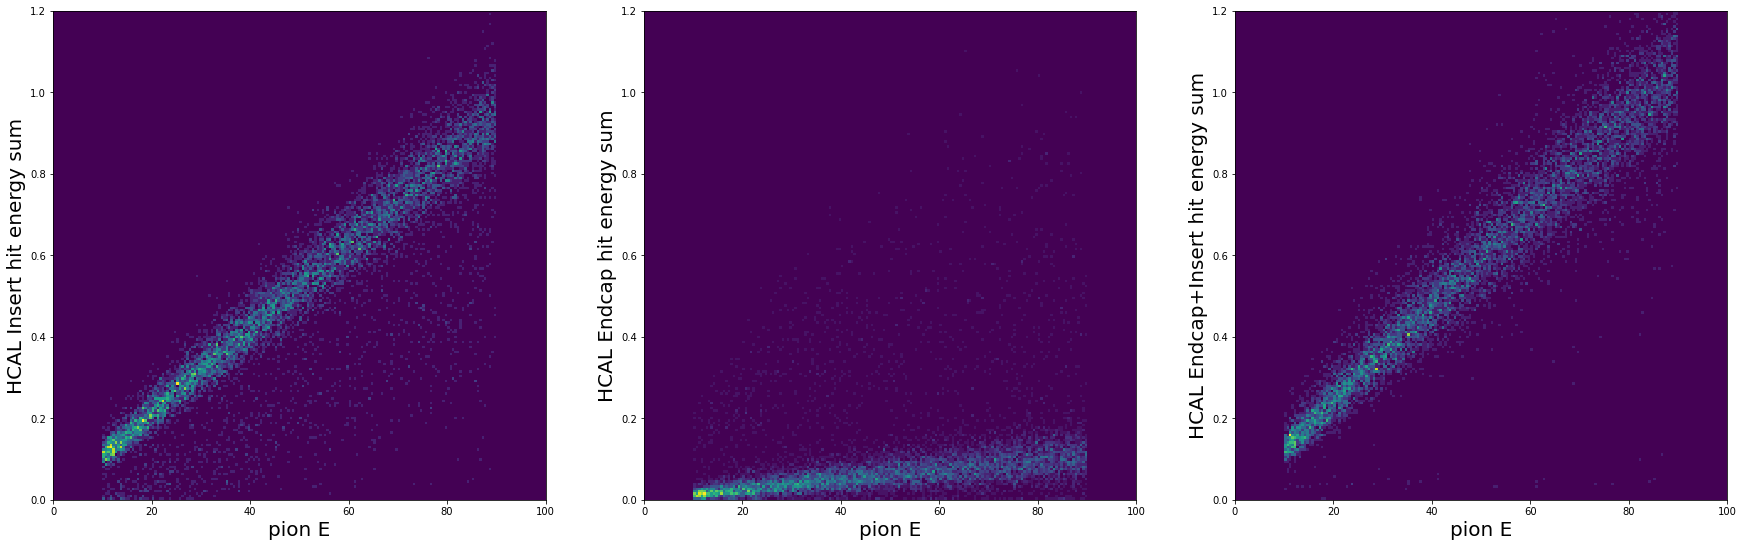

In [97]:
fig,ax = plt.subplots(1,3, figsize=(30, 9))



ax[0].hist2d(pion_e, hcal_eci_hits_e_ar.sum(), bins=200, range=([0,100],[0,1.2]) )
ax[1].hist2d(pion_e, hcal_ec_hits_e_ar.sum(), bins=200, range=([0,100],[0,1.2]) )
ax[2].hist2d(pion_e, hcal_ec_hits_e_ar.sum() + hcal_eci_hits_e_ar.sum(), bins=200, range=([0,100],[0,1.2]) )

ax[0].set_xlabel('pion E',fontsize=20)
ax[1].set_xlabel('pion E',fontsize=20)
ax[2].set_xlabel('pion E',fontsize=20)

ax[0].set_ylabel('HCAL Insert hit energy sum',fontsize=20)
ax[1].set_ylabel('HCAL Endcap hit energy sum',fontsize=20)
ax[2].set_ylabel('HCAL Endcap+Insert hit energy sum',fontsize=20)

plt.savefig('esum-vs-e.pdf')
#plt.show()

<ipython-input-99-1b75cac2d680>:4: RuntimeWarning: divide by zero encountered in true_divide
  ax[2].hist(hcal_ec_hits_e_ar.sum()/hcal_eci_hits_e_ar.sum(), bins=200, range=[0,1] )
<ipython-input-99-1b75cac2d680>:4: RuntimeWarning: invalid value encountered in true_divide
  ax[2].hist(hcal_ec_hits_e_ar.sum()/hcal_eci_hits_e_ar.sum(), bins=200, range=[0,1] )


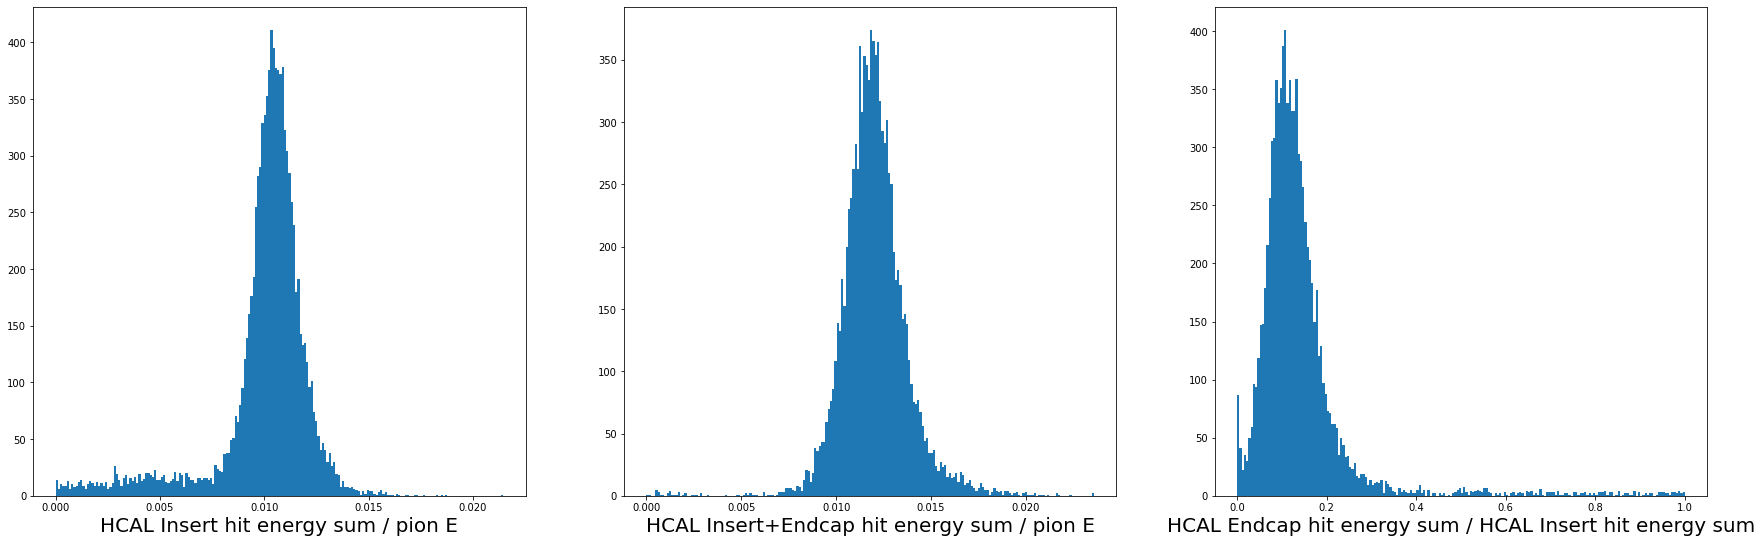

In [99]:
fig,ax = plt.subplots(1,3, figsize=(30, 9))
ax[0].hist(hcal_eci_hits_e_ar.sum()/pion_e, bins=200 )
ax[1].hist((hcal_ec_hits_e_ar.sum() + hcal_eci_hits_e_ar.sum())/pion_e, bins=200 )
ax[2].hist(hcal_ec_hits_e_ar.sum()/hcal_eci_hits_e_ar.sum(), bins=200, range=[0,1] )

ax[0].set_xlabel('HCAL Insert hit energy sum / pion E', fontsize=20)
ax[1].set_xlabel('HCAL Insert+Endcap hit energy sum / pion E', fontsize=20)
ax[2].set_xlabel('HCAL Endcap hit energy sum / HCAL Insert hit energy sum', fontsize=20)

plt.savefig('esum-over-e.pdf')
#plt.show()

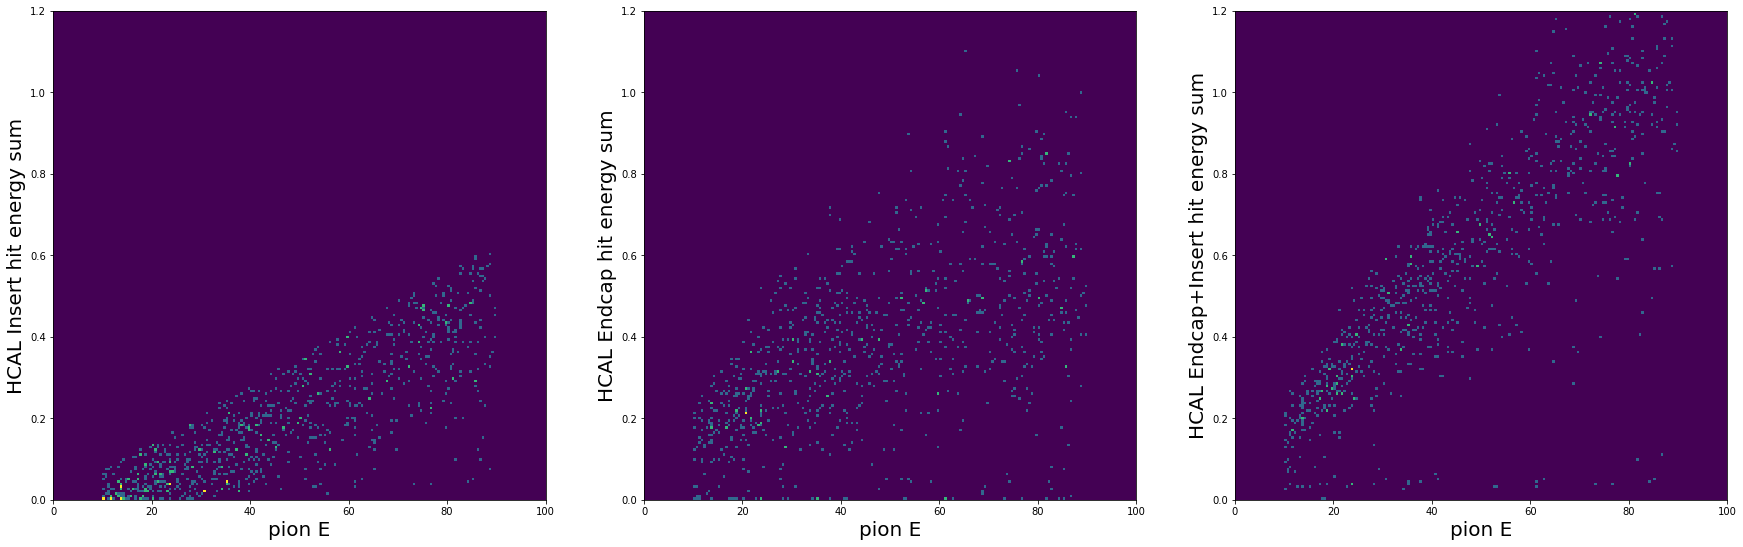

In [100]:
fig,ax = plt.subplots(1,3, figsize=(30, 9))

eci_esum = hcal_eci_hits_e_ar.sum()
ec_esum = hcal_ec_hits_e_ar.sum()

cuts=eci_esum/pion_e<0.007

ax[0].hist2d(pion_pz[cuts], eci_esum[cuts], bins=200, range=([0,100],[0,1.2]) )
ax[1].hist2d(pion_pz[cuts], ec_esum[cuts], bins=200, range=([0,100],[0,1.2]) )
ax[2].hist2d(pion_pz[cuts], (ec_esum[cuts] + eci_esum[cuts]), bins=200, range=([0,100],[0,1.2]) )

ax[0].set_xlabel('pion E',fontsize=20)
ax[1].set_xlabel('pion E',fontsize=20)
ax[2].set_xlabel('pion E',fontsize=20)

ax[0].set_ylabel('HCAL Insert hit energy sum',fontsize=20)
ax[1].set_ylabel('HCAL Endcap hit energy sum',fontsize=20)
ax[2].set_ylabel('HCAL Endcap+Insert hit energy sum',fontsize=20)

plt.savefig('esum-vs-e-tail-only.pdf')
#plt.show()

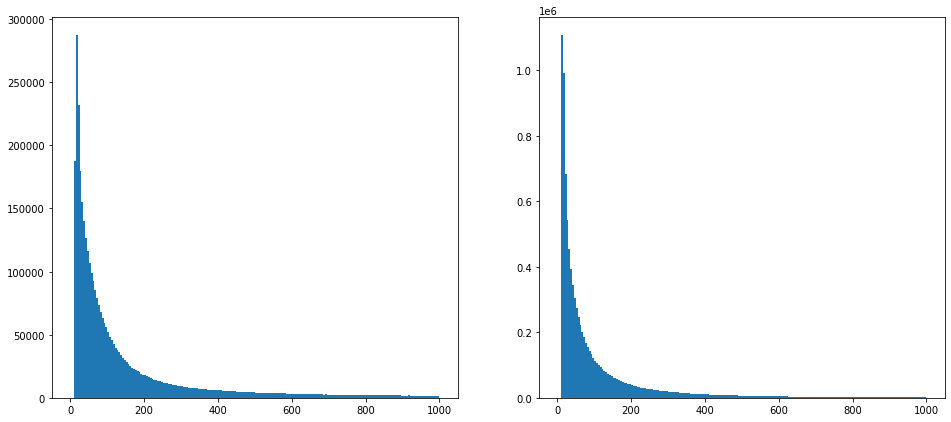

In [48]:
fig,ax = plt.subplots(1,2, figsize=(16, 7))
ax[0].hist( hcal_ec_hits_t_ar_flat, bins=200, range=([0,1000]))
ax[1].hist( hcal_eci_hits_t_ar_flat, bins=200, range=([0,1000]))
plt.show()

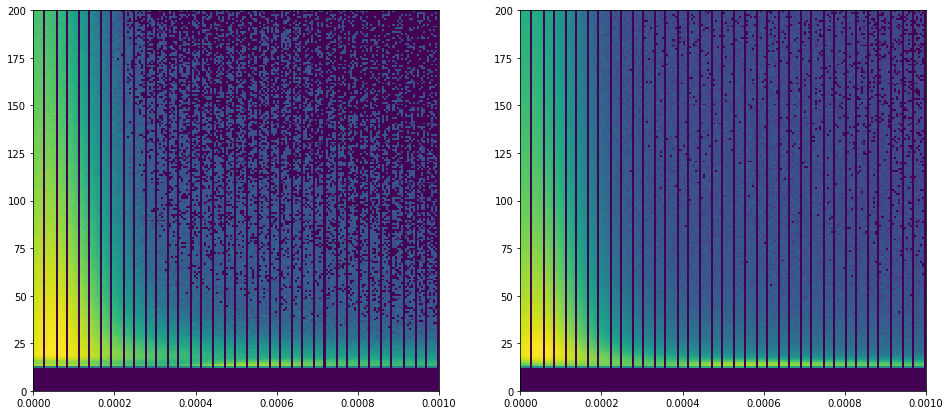

In [49]:
fig,ax = plt.subplots(1,2, figsize=(16, 7))

ax[0].hist2d( hcal_ec_hits_e_ar_flat, hcal_ec_hits_t_ar_flat, bins=200, range=([0,0.001],[0,200]), norm=mcolors.PowerNorm(0.2) )
ax[1].hist2d( hcal_eci_hits_e_ar_flat, hcal_eci_hits_t_ar_flat, bins=200, range=([0,0.001],[0,200]), norm=mcolors.PowerNorm(0.2) )

plt.show()

In [50]:
df_hcal_endcappinsert_hits = ur_tree.pandas.df( ['HcalEndcapPInsertHitsReco.*'], entrystop=100, flatten=False )

In [51]:
df_hcal_endcappinsert_hits

,HcalEndcapPInsertHitsReco.cellID,HcalEndcapPInsertHitsReco.energy,HcalEndcapPInsertHitsReco.energyError,HcalEndcapPInsertHitsReco.time,HcalEndcapPInsertHitsReco.timeError,HcalEndcapPInsertHitsReco.position.x,HcalEndcapPInsertHitsReco.position.y,HcalEndcapPInsertHitsReco.position.z,HcalEndcapPInsertHitsReco.dimension.x,HcalEndcapPInsertHitsReco.dimension.y,HcalEndcapPInsertHitsReco.dimension.z,HcalEndcapPInsertHitsReco.sector,HcalEndcapPInsertHitsReco.layer,HcalEndcapPInsertHitsReco.local.x,HcalEndcapPInsertHitsReco.local.y,HcalEndcapPInsertHitsReco.local.z
entry,,,,,,,,,,,,,,,,
0,"[1407353450692714, 281449248915562, 1407353450...","[0.0006347656, 0.00029296876, 0.098034665, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[12.78, 1762.65, 12.85, 12.93, 13.01, 13.12, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-250.0, -280.0, -250.0, -250.0, -250.0, -250....","[120.0, 0.0, 120.0, 120.0, 120.0, 150.0, 150.0...","[3819.95, 3843.35, 3843.35, 3866.75, 3890.15, ...","[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....","[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-150.0, -180.0, -150.0, -150.0, -150.0, -150....","[120.0, 0.0, 120.0, 120.0, 120.0, 150.0, 150.0...","[-573.1, -549.7, -549.7, -526.3, -502.9, -479...."
1,"[1970320584015978, 2251786970792042, 184453367...","[0.01404419, 0.000604248, 4.272461e-05, 6.7138...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[12.84, 66.43, 23.54, 82.23, 188.61, 227.26, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-130.0, -190.0, -10.0, 20.0, -10.0, -40.0, -1...","[180.0, 210.0, -150.0, -210.0, -240.0, -270.0,...","[3843.35, 3843.35, 3913.55, 3890.15, 3983.75, ...","[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....","[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-30.0, -90.0, 90.0, 120.0, 90.0, 60.0, 0.0, 0...","[180.0, 210.0, -150.0, -210.0, -240.0, -270.0,...","[-549.7, -549.7, -479.5, -502.9, -409.3, -409...."
2,"[18445055223891263594, 18445055223891296362, 1...","[0.00048828125, 0.0005493164, 0.000579834, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[12.77, 12.85, 12.92, 13.0, 13.08, 13.16, 14.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-100.0, -100.0, -100.0, -100.0, -100.0, -100....","[-180.0, -180.0, -180.0, -180.0, -180.0, -180....","[3819.95, 3843.35, 3866.75, 3890.15, 3913.55, ...","[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....","[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -30.0, -60...","[-180.0, -180.0, -180.0, -180.0, -180.0, -180....","[-573.1, -549.7, -526.3, -502.9, -479.5, -456...."
3,"[2251799855726698, 1970329174016106, 168885419...","[0.00025634764, 0.0001953125, 0.00021362305, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[20.13, 30.94, 16.7, 17.42, 26.1, 28.1, 12.95,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-100.0, -70.0, -70.0, -100.0, -190.0, -160.0,...","[240.0, 210.0, 180.0, 210.0, 270.0, 270.0, 150...","[3866.75, 3890.15, 3890.15, 3890.15, 3819.95, ...","[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....","[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[0.0, 30.0, 30.0, 0.0, -90.0, -60.0, -60.0, 27...","[240.0, 210.0, 180.0, 210.0, 270.0, 270.0, 150...","[-526.3, -502.9, -502.9, -502.9, -573.1, -526...."
4,"[844399202304106, 844399202336874, 84439920236...","[0.00047607423, 0.00039

In [52]:
df_hcal_endcappinsert_hits.columns

Index(['HcalEndcapPInsertHitsReco.cellID', 'HcalEndcapPInsertHitsReco.energy',
       'HcalEndcapPInsertHitsReco.energyError',
       'HcalEndcapPInsertHitsReco.time', 'HcalEndcapPInsertHitsReco.timeError',
       'HcalEndcapPInsertHitsReco.position.x',
       'HcalEndcapPInsertHitsReco.position.y',
       'HcalEndcapPInsertHitsReco.position.z',
       'HcalEndcapPInsertHitsReco.dimension.x',
       'HcalEndcapPInsertHitsReco.dimension.y',
       'HcalEndcapPInsertHitsReco.dimension.z',
       'HcalEndcapPInsertHitsReco.sector', 'HcalEndcapPInsertHitsReco.layer',
       'HcalEndcapPInsertHitsReco.local.x',
       'HcalEndcapPInsertHitsReco.local.y',
       'HcalEndcapPInsertHitsReco.local.z'],
      dtype='object')

In [53]:
df_hcal_endcappinsert_hits.columns.str.replace('.','_')

<ipython-input-53-77f70201380c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_hcal_endcappinsert_hits.columns.str.replace('.','_')


Index(['HcalEndcapPInsertHitsReco_cellID', 'HcalEndcapPInsertHitsReco_energy',
       'HcalEndcapPInsertHitsReco_energyError',
       'HcalEndcapPInsertHitsReco_time', 'HcalEndcapPInsertHitsReco_timeError',
       'HcalEndcapPInsertHitsReco_position_x',
       'HcalEndcapPInsertHitsReco_position_y',
       'HcalEndcapPInsertHitsReco_position_z',
       'HcalEndcapPInsertHitsReco_dimension_x',
       'HcalEndcapPInsertHitsReco_dimension_y',
       'HcalEndcapPInsertHitsReco_dimension_z',
       'HcalEndcapPInsertHitsReco_sector', 'HcalEndcapPInsertHitsReco_layer',
       'HcalEndcapPInsertHitsReco_local_x',
       'HcalEndcapPInsertHitsReco_local_y',
       'HcalEndcapPInsertHitsReco_local_z'],
      dtype='object')

In [54]:
df_hcal_endcappinsert_hits.columns = df_hcal_endcappinsert_hits.columns.str.replace('.','_')

<ipython-input-54-0cb235fcd6f7>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_hcal_endcappinsert_hits.columns = df_hcal_endcappinsert_hits.columns.str.replace('.','_')


In [55]:
df_hcal_endcappinsert_hits

,HcalEndcapPInsertHitsReco_cellID,HcalEndcapPInsertHitsReco_energy,HcalEndcapPInsertHitsReco_energyError,HcalEndcapPInsertHitsReco_time,HcalEndcapPInsertHitsReco_timeError,HcalEndcapPInsertHitsReco_position_x,HcalEndcapPInsertHitsReco_position_y,HcalEndcapPInsertHitsReco_position_z,HcalEndcapPInsertHitsReco_dimension_x,HcalEndcapPInsertHitsReco_dimension_y,HcalEndcapPInsertHitsReco_dimension_z,HcalEndcapPInsertHitsReco_sector,HcalEndcapPInsertHitsReco_layer,HcalEndcapPInsertHitsReco_local_x,HcalEndcapPInsertHitsReco_local_y,HcalEndcapPInsertHitsReco_local_z
entry,,,,,,,,,,,,,,,,
0,"[1407353450692714, 281449248915562, 1407353450...","[0.0006347656, 0.00029296876, 0.098034665, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[12.78, 1762.65, 12.85, 12.93, 13.01, 13.12, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-250.0, -280.0, -250.0, -250.0, -250.0, -250....","[120.0, 0.0, 120.0, 120.0, 120.0, 150.0, 150.0...","[3819.95, 3843.35, 3843.35, 3866.75, 3890.15, ...","[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....","[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-150.0, -180.0, -150.0, -150.0, -150.0, -150....","[120.0, 0.0, 120.0, 120.0, 120.0, 150.0, 150.0...","[-573.1, -549.7, -549.7, -526.3, -502.9, -479...."
1,"[1970320584015978, 2251786970792042, 184453367...","[0.01404419, 0.000604248, 4.272461e-05, 6.7138...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[12.84, 66.43, 23.54, 82.23, 188.61, 227.26, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-130.0, -190.0, -10.0, 20.0, -10.0, -40.0, -1...","[180.0, 210.0, -150.0, -210.0, -240.0, -270.0,...","[3843.35, 3843.35, 3913.55, 3890.15, 3983.75, ...","[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....","[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-30.0, -90.0, 90.0, 120.0, 90.0, 60.0, 0.0, 0...","[180.0, 210.0, -150.0, -210.0, -240.0, -270.0,...","[-549.7, -549.7, -479.5, -502.9, -409.3, -409...."
2,"[18445055223891263594, 18445055223891296362, 1...","[0.00048828125, 0.0005493164, 0.000579834, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[12.77, 12.85, 12.92, 13.0, 13.08, 13.16, 14.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-100.0, -100.0, -100.0, -100.0, -100.0, -100....","[-180.0, -180.0, -180.0, -180.0, -180.0, -180....","[3819.95, 3843.35, 3866.75, 3890.15, 3913.55, ...","[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....","[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -30.0, -60...","[-180.0, -180.0, -180.0, -180.0, -180.0, -180....","[-573.1, -549.7, -526.3, -502.9, -479.5, -456...."
3,"[2251799855726698, 1970329174016106, 168885419...","[0.00025634764, 0.0001953125, 0.00021362305, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[20.13, 30.94, 16.7, 17.42, 26.1, 28.1, 12.95,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-100.0, -70.0, -70.0, -100.0, -190.0, -160.0,...","[240.0, 210.0, 180.0, 210.0, 270.0, 270.0, 150...","[3866.75, 3890.15, 3890.15, 3890.15, 3819.95, ...","[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....","[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[0.0, 30.0, 30.0, 0.0, -90.0, -60.0, -60.0, 27...","[240.0, 210.0, 180.0, 210.0, 270.0, 270.0, 150...","[-526.3, -502.9, -502.9, -502.9, -573.1, -526...."
4,"[844399202304106, 844399202336874, 84439920236...","[0.00047607423, 0.00039

In [56]:
hcal_ec_hits_t_ar

<JaggedArray [[134.26 15.35 41.26 ... 286.03 1087.82 8098.58] [72.27 39.69 16.37 ... 23.38 27.86 363.31] [55.93 26.44 131.69 ... 605.03 7595.73 35.84] ... [375.67 50.65 9573.19 ... 2428.98 44.36 18.16] [20.56 68.16 44.38 ... 2144.31 4278.61 4163.15] [183.62 852.93 82.41 ... 3806.12 60.99 73.53]] at 0x0002362e3c70>

In [57]:
hcal_ec_hits_t_ar[hcal_ec_hits_t_ar<50]

<JaggedArray [[15.35 41.26 25.46 ... 35.94 49.29 29.58] [39.69 16.37 35.59 ... 28.33 23.38 27.86] [26.44 20.38 36.34 ... 34.68 48.69 35.84] ... [20.01 44.36 18.16] [20.56 44.38 26.66 ... 23.93 19.76 38.0] [26.83 43.28 22.11 17.38]] at 0x00023753ee80>

In [58]:
hcal_ec_hits_t_ar<50

<JaggedArray [[False True True ... False False False] [False True True ... True True False] [False True False ... False False True] ... [False False False ... False True True] [True False True ... False False False] [False False False ... False False False]] at 0x00023731c940>

In [59]:
cuts=hcal_ec_hits_x_ar_flat<1000
cuts

array([ True,  True,  True, ...,  True,  True,  True])

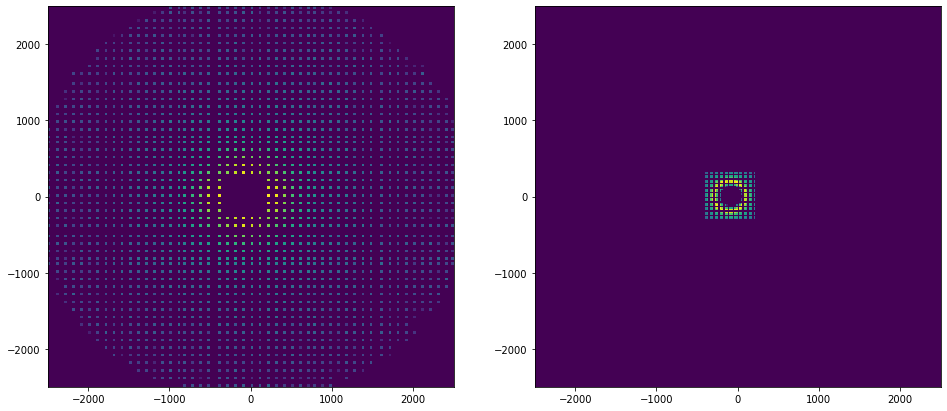

In [60]:
fig,ax = plt.subplots(1,2, figsize=(16, 7))

cuts = hcal_ec_hits_t_ar_flat<150
ax[0].hist2d( hcal_ec_hits_x_ar_flat[cuts], hcal_ec_hits_y_ar_flat[cuts], weights=hcal_ec_hits_e_ar_flat[cuts], bins=150, range=([-2500,2500],[-2500,2500]), norm=mcolors.PowerNorm(0.2)) 

cuts = hcal_eci_hits_t_ar_flat<150
ax[1].hist2d( hcal_eci_hits_x_ar_flat[cuts], hcal_eci_hits_y_ar_flat[cuts], weights=hcal_eci_hits_e_ar_flat[cuts], bins=250, range=([-2500,2500],[-2500,2500]), norm=mcolors.PowerNorm(0.2)) 

plt.show()

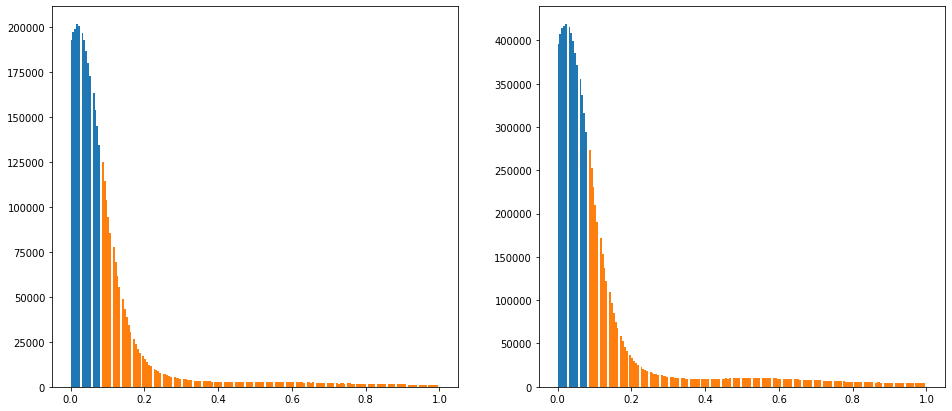

In [61]:
fig,ax = plt.subplots(1,2, figsize=(16, 7))

cuts=hcal_ec_hits_e_ar_flat*1000>0.1*0.8
ax[0].hist( hcal_ec_hits_e_ar_flat*1000, bins=200, range=([0,1]))
ax[0].hist( hcal_ec_hits_e_ar_flat[cuts]*1000, bins=200, range=([0,1]))

cuts=hcal_eci_hits_e_ar_flat*1000>0.1*0.8
ax[1].hist( hcal_eci_hits_e_ar_flat*1000, bins=200, range=([0,1]))
ax[1].hist( hcal_eci_hits_e_ar_flat[cuts]*1000, bins=200, range=([0,1]))

plt.show()

In [62]:
cuts = hcal_ec_hits_t_ar_flat<150
cuts

array([ True,  True,  True, ..., False,  True,  True])

In [63]:
cut1 = hcal_ec_hits_t_ar_flat<150
cut2 = hcal_ec_hits_e_ar_flat*1000>0.1*0.8


In [64]:
cuts = np.logical_and( cut1, cut2)
cuts

array([ True,  True, False, ..., False, False, False])

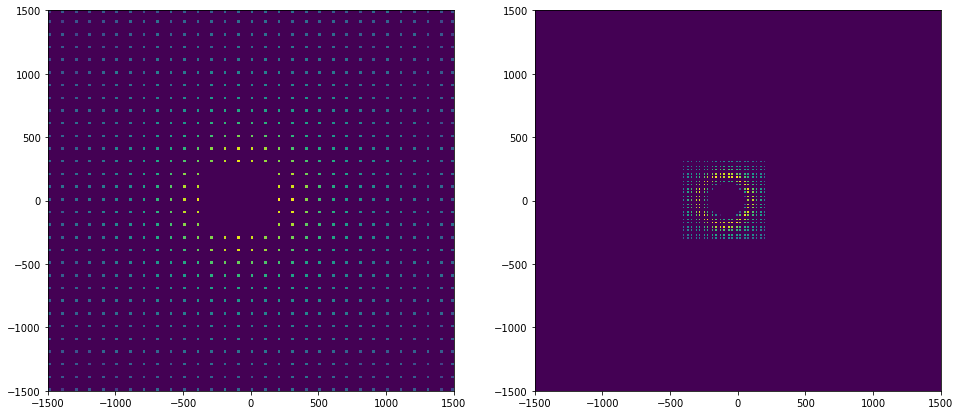

In [65]:
fig,ax = plt.subplots(1,2, figsize=(16, 7))

xyrange = 1500

cut1 = hcal_ec_hits_t_ar_flat<150
cut2 = hcal_ec_hits_e_ar_flat*1000>0.1*0.8
cuts = np.logical_and( cut1, cut2)
ax[0].hist2d( hcal_ec_hits_x_ar_flat[cuts], hcal_ec_hits_y_ar_flat[cuts], weights=hcal_ec_hits_e_ar_flat[cuts], bins=150, range=([-1*xyrange,xyrange],[-1*xyrange,xyrange]), norm=mcolors.PowerNorm(0.2)) 

cut1 = hcal_eci_hits_t_ar_flat<150
cut2 = hcal_eci_hits_e_ar_flat*1000>0.1*0.8
cuts = np.logical_and( cut1, cut2)
ax[1].hist2d( hcal_eci_hits_x_ar_flat[cuts], hcal_eci_hits_y_ar_flat[cuts], weights=hcal_eci_hits_e_ar_flat[cuts], bins=250, range=([-1*xyrange,xyrange],[-1*xyrange,xyrange]), norm=mcolors.PowerNorm(0.2)) 

plt.show()

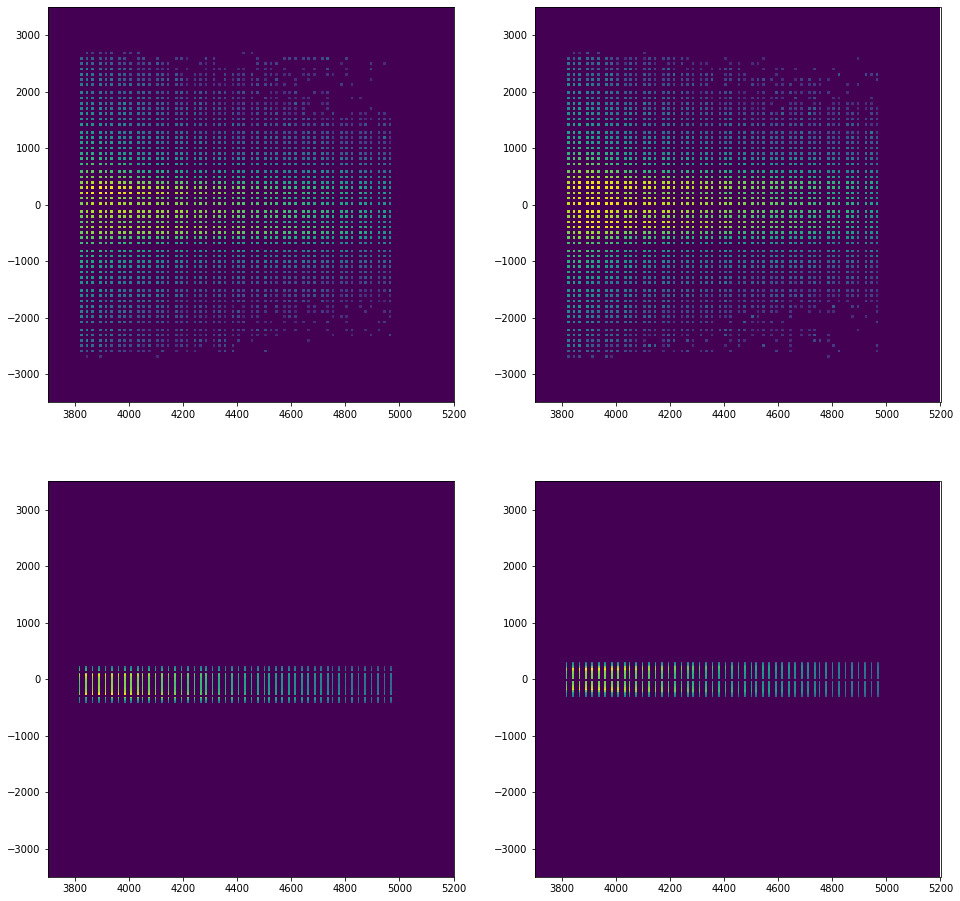

In [66]:
fig,ax = plt.subplots(2,2, figsize=(16, 16))

xyrange = 3500
zmin = 3700
zmax = 5200

cut1 = hcal_ec_hits_t_ar_flat<150
cut2 = hcal_ec_hits_e_ar_flat*1000>0.1*0.8
cuts = np.logical_and( cut1, cut2)

ax[0][0].hist2d( hcal_ec_hits_z_ar_flat[cuts], hcal_ec_hits_x_ar_flat[cuts], 
                weights=hcal_ec_hits_e_ar_flat[cuts], bins=150,  range=([zmin,zmax],[-1*xyrange,xyrange]), norm=mcolors.PowerNorm(0.2)) 



cut1 = hcal_ec_hits_t_ar_flat<150
cut2 = hcal_ec_hits_e_ar_flat*1000>0.1*0.8
cuts = np.logical_and( cut1, cut2)
ax[0][1].hist2d( hcal_ec_hits_z_ar_flat[cuts], hcal_ec_hits_y_ar_flat[cuts], 
                weights=hcal_ec_hits_e_ar_flat[cuts], bins=150, range=([zmin,zmax],[-1*xyrange,xyrange]), norm=mcolors.PowerNorm(0.2)) 



cut1 = hcal_eci_hits_t_ar_flat<150
cut2 = hcal_eci_hits_e_ar_flat*1000>0.1*0.8
cuts = np.logical_and( cut1, cut2)
ax[1][0].hist2d( hcal_eci_hits_z_ar_flat[cuts], hcal_eci_hits_x_ar_flat[cuts], 
                weights=hcal_eci_hits_e_ar_flat[cuts], bins=250,  range=([zmin,zmax],[-1*xyrange,xyrange]), norm=mcolors.PowerNorm(0.2)) 

cut1 = hcal_eci_hits_t_ar_flat<150
cut2 = hcal_eci_hits_e_ar_flat*1000>0.1*0.8
cuts = np.logical_and( cut1, cut2)
ax[1][1].hist2d( hcal_eci_hits_z_ar_flat[cuts], hcal_eci_hits_y_ar_flat[cuts], 
                weights=hcal_eci_hits_e_ar_flat[cuts], bins=250,  range=([zmin,zmax],[-1*xyrange,xyrange]), norm=mcolors.PowerNorm(0.2)) 



plt.show()

nbins_z = 128
nbins_ec = 60
nbins_ec = 200


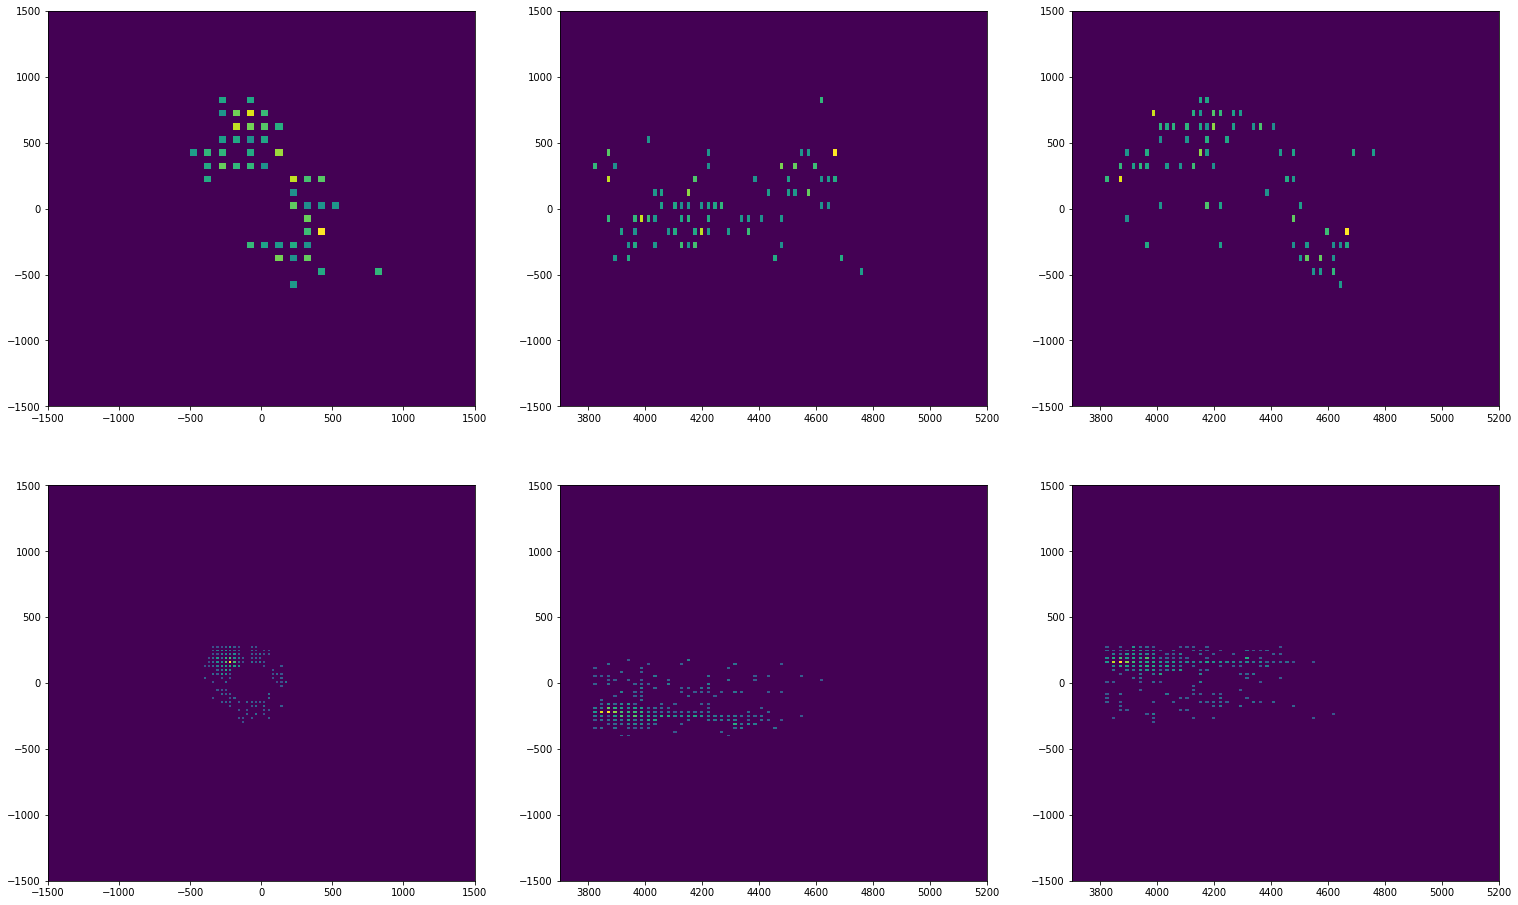

In [67]:
fig,ax = plt.subplots(2,3, figsize=(26, 16))


ei=9

xyrange = 1500
dxy_ec = 100
dxy_eci = 30

zmin = 3700
zmax = 5200
dz = 23.4



nbins_z = int(2*(zmax-zmin)/dz)
print( "nbins_z = %d" % nbins_z )

nbins_ec = int(2*2*xyrange/dxy_ec)
print( "nbins_ec = %d" % nbins_ec )

nbins_eci = int(2*2*xyrange/dxy_eci)
print( "nbins_ec = %d" % nbins_eci )



cut1 = hcal_ec_hits_t_ar[ei]<150
cut2 = hcal_ec_hits_e_ar[ei]*1000>0.1*0.8
cuts = np.logical_and( cut1, cut2)



ax[0][0].hist2d( hcal_ec_hits_x_ar[ei][cuts], hcal_ec_hits_y_ar[ei][cuts], 
                weights=hcal_ec_hits_e_ar[ei][cuts], bins=nbins_ec, range=([-1*xyrange,xyrange],[-1*xyrange,xyrange]), norm=mcolors.PowerNorm(0.2))

ax[0][1].hist2d( hcal_ec_hits_z_ar[ei][cuts], hcal_ec_hits_x_ar[ei][cuts], 
                weights=hcal_ec_hits_e_ar[ei][cuts], bins=[nbins_z,nbins_ec],  range=([zmin,zmax],[-1*xyrange,xyrange]), norm=mcolors.PowerNorm(0.2)) 

ax[0][2].hist2d( hcal_ec_hits_z_ar[ei][cuts], hcal_ec_hits_y_ar[ei][cuts], 
                weights=hcal_ec_hits_e_ar[ei][cuts], bins=[nbins_z,nbins_ec], range=([zmin,zmax],[-1*xyrange,xyrange]), norm=mcolors.PowerNorm(0.2)) 
 




cut1 = hcal_eci_hits_t_ar[ei]<150
cut2 = hcal_eci_hits_e_ar[ei]*1000>0.1*0.8
cuts = np.logical_and( cut1, cut2)

ax[1][0].hist2d( hcal_eci_hits_x_ar[ei][cuts], hcal_eci_hits_y_ar[ei][cuts], 
                weights=hcal_eci_hits_e_ar[ei][cuts], bins=nbins_eci,  range=([-1*xyrange,xyrange],[-1*xyrange,xyrange]), norm=mcolors.PowerNorm(0.2)) 


ax[1][1].hist2d( hcal_eci_hits_z_ar[ei][cuts], hcal_eci_hits_x_ar[ei][cuts], 
                weights=hcal_eci_hits_e_ar[ei][cuts], bins=[nbins_z, nbins_eci],  range=([zmin,zmax],[-1*xyrange,xyrange]), norm=mcolors.PowerNorm(0.2)) 


ax[1][2].hist2d( hcal_eci_hits_z_ar[ei][cuts], hcal_eci_hits_y_ar[ei][cuts], 
                weights=hcal_eci_hits_e_ar[ei][cuts], bins=[nbins_z, nbins_eci],  range=([zmin,zmax],[-1*xyrange,xyrange]), norm=mcolors.PowerNorm(0.2)) 

plt.savefig("evt-disp-%02d.pdf" % ei )
#plt.show()



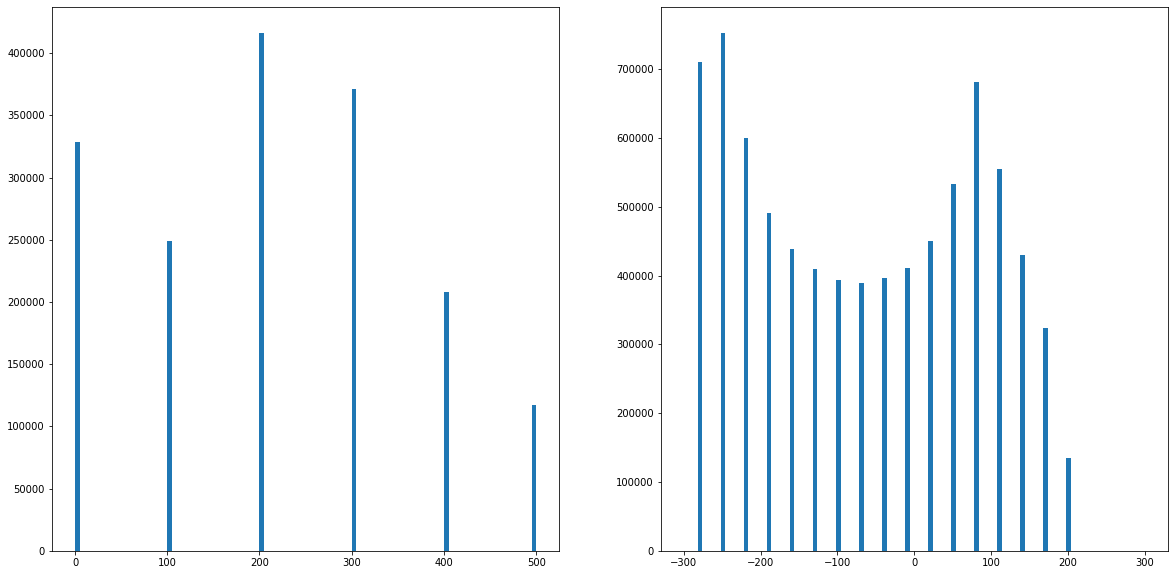

In [68]:
fig,ax = plt.subplots(1,2, figsize=(20, 10))


ax[0].hist(hcal_ec_hits_x_ar_flat, bins=100, range=[0,500])

ax[1].hist(hcal_eci_hits_x_ar_flat, bins=100, range=[-300,300])

plt.show()

In [69]:
hcal_eci_hits_x_ar_flat

array([-250., -280., -250., ..., -340., -340., -280.], dtype=float32)

In [70]:
hcal_ec_hits_x_ar_flat

array([-400., -400., -400., ..., -400., -400., -400.], dtype=float32)

In [71]:
hcal_ec_hits_z_ar_flat

array([4125.7, 4055.5, 4055.5, ..., 4102.3, 4078.9, 4125.7], dtype=float32)

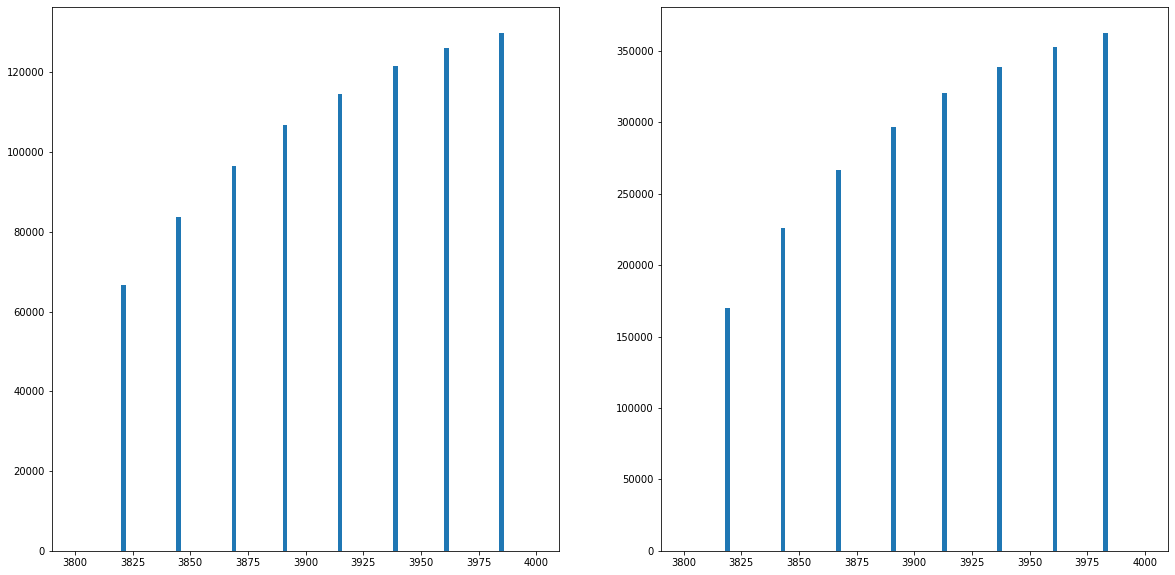

In [72]:
fig,ax = plt.subplots(1,2, figsize=(20, 10))


ax[0].hist(hcal_ec_hits_z_ar_flat, bins=100, range=[3800,4000])

ax[1].hist(hcal_eci_hits_z_ar_flat, bins=100, range=[3800,4000])

plt.show()

In [73]:
cut = hcal_ec_hits_z_ar_flat<3875
hcal_ec_hits_z_ar_flat[cut]

array([3868.3, 3844.9, 3868.3, ..., 3868.3, 3868.3, 3868.3], dtype=float32)